In [1]:
import numpy as np #linear algebrae
import pandas as pd#data processin
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df=df.iloc[:,2:]


In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
350,38,113000,1
27,47,30000,1
149,20,74000,0
72,20,23000,0
152,31,76000,0


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)


In [9]:
x_train.shape

(280, 2)

In [10]:
x_test.shape

(120, 2)

In [11]:
#standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train) #fit means calculating mean
#transform train and test sets both.
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [13]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


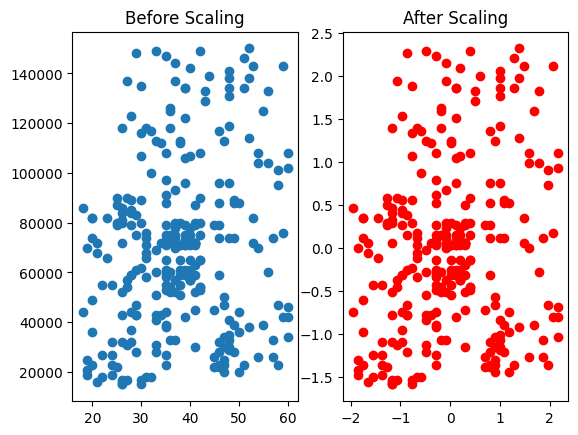

In [19]:
#Effect of Scaling
f,(ax1,ax2)=plt.subplots(1,2)
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

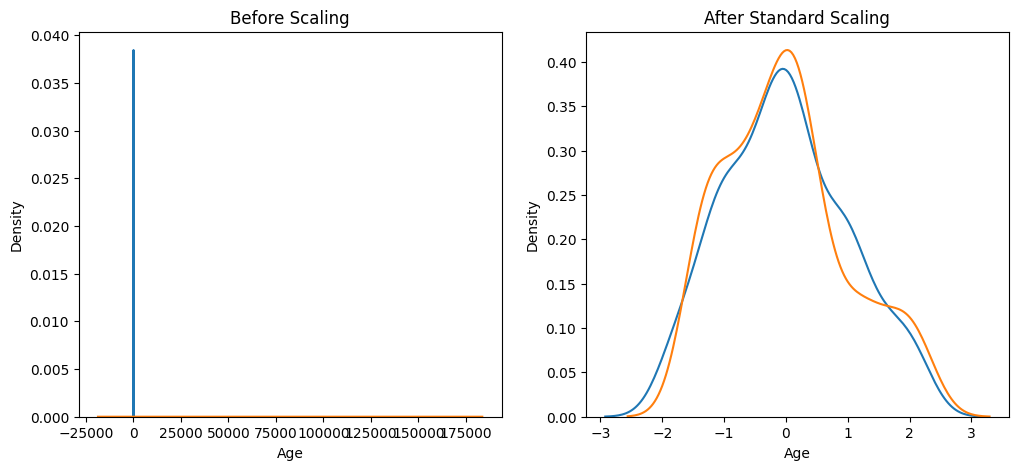

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)


#After scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


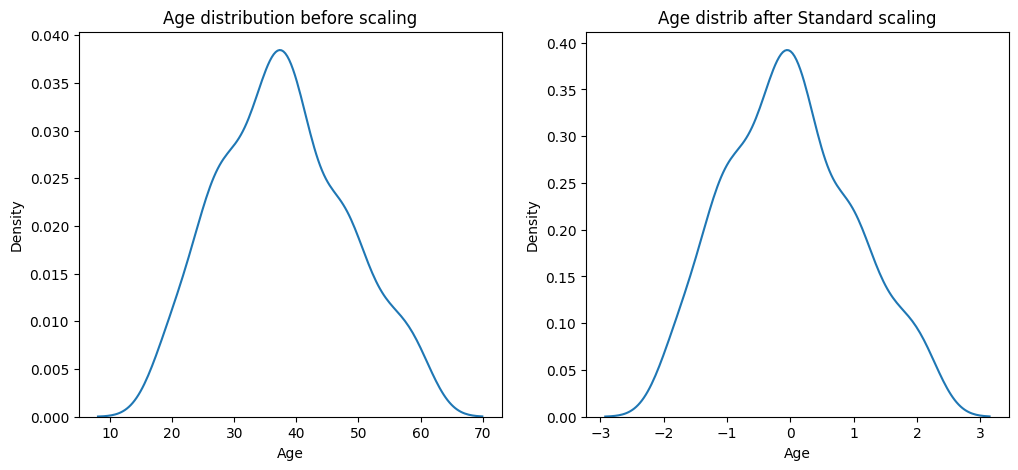

In [25]:
#comparision of distribution
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title("Age distribution before scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

#after scaling
ax2.set_title("Age distrib after Standard scaling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [28]:
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
lr_scaled.fit(x_train_scaled,y_train)


LogisticRegression()

In [30]:
LogisticRegression()

LogisticRegression()

In [31]:
y_pred=lr.predict(x_test)

In [32]:
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [33]:
from sklearn.metrics import accuracy_score

In [35]:
print("Actual",accuracy_score(y_test,y_pred))

Actual 0.875


In [38]:
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Scaled 0.8666666666666667


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [41]:

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [42]:
y_pred=dt.predict(x_test)

In [43]:
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [44]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


AttributeError: 'DataFrame' object has no attribute 'append'

In [58]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

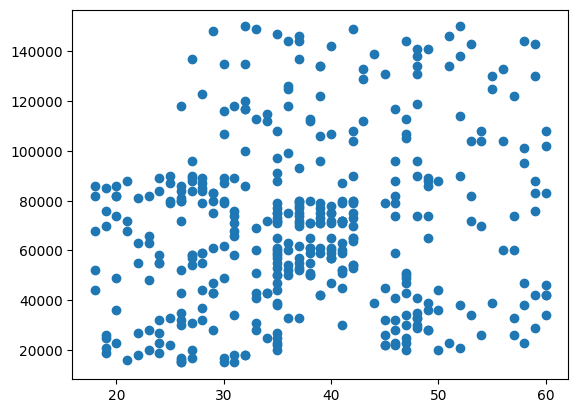

In [60]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

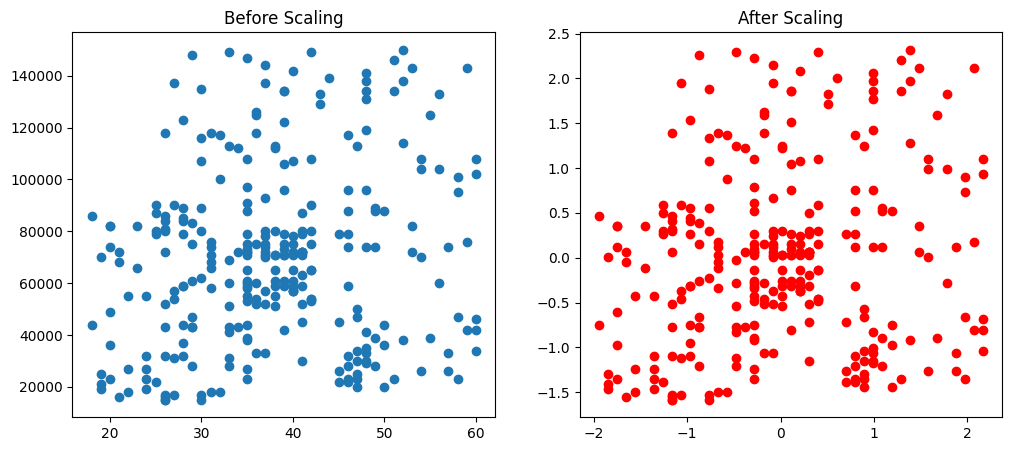

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()